  ## Introduction
  
This project will explore Starbucks and their nutritional facts of their 2017 drink menu.  The data set was taken from Kaggle [Kaggle website link] (https://www.kaggle.com/starbucks/starbucks-menu#starbucks_drinkMenu_expanded.csv)

### Questions To Explore from this Data
 - What drink has the most sugar?
 - What drinks are available with less than 250 calories?  With lowest sugar?
 
 What drinks are available with less than 160 calories and less than 20 grams of sugar?
 - What type of drink has the most protein?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

df=pd.read_csv('starbucks_drinkMenu_expanded.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [2]:
import pyplot_themes as themes
themes.__version__

'0.2.2'

In [3]:
#Check data types
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [4]:
#Change column names for easier reference
df.columns=['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat', 'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol', 'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium', 'Iron', 'Caffeine']
df.columns

Index(['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat',
       'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol',
       'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium',
       'Iron', 'Caffeine'],
      dtype='object')

In [5]:
df.describe()

,Calories,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


The average mean of sugar is almost 33 grams from the data.  There is even one with 84.9 grams of sugar!

In [6]:
#Checke for duplicates
sum(df.duplicated())

0

In [7]:
df.isnull().sum()

Bev_category     0
Beverage         0
Bev_prep         0
Calories         0
Total_Fat        0
Trans_Fat        0
Sat_Fat          0
Sodium           0
Total_carbs      0
Cholesterol      0
Dietary_Fiber    0
Sugars           0
Protein          0
Vit_A            0
Vit_C            0
Calcium          0
Iron             0
Caffeine         1
dtype: int64

In [8]:
#Find the item with the null Caffeine value
#https://stackoverflow.com/questions/14247586/python-pandas-how-to-select-rows-with-one-or-more-nulls-from-a-dataframe-without
df[df.isnull().any(axis=1)]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [9]:
df[df['Bev_category']=="Shaken Iced Beverages"].iloc[:6]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
154,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Tall,60,0,0.0,0.0,0,4,15,0,15,0.2,0%,0%,0%,0%,120
155,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,90,0.1,0.0,0.0,0,5,21,0,21,0.3,0%,0%,0%,0%,165
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,0,31,0.4,0%,0%,0%,0%,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2%,0%,6%,0%,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1,0.1,0.0,0,20,17,0,17,2.0,2%,0%,6%,0%,90


In [10]:
# replace NaN value in caffiene with 90
df["Caffeine"].fillna( method ='ffill', inplace = True)

In [11]:
#Check for any other null values
df[df.isnull().any(axis=1)]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine


In [12]:
df[df['Bev_category']=="Shaken Iced Beverages"].iloc[:6]

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
154,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Tall,60,0,0.0,0.0,0,4,15,0,15,0.2,0%,0%,0%,0%,120
155,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,90,0.1,0.0,0.0,0,5,21,0,21,0.3,0%,0%,0%,0%,165
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,0,31,0.4,0%,0%,0%,0%,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2%,0%,6%,0%,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,90
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1,0.1,0.0,0,20,17,0,17,2.0,2%,0%,6%,0%,90


In [13]:
#Why is Bev_prep column missing a size with 2% milk or Soymilk?
df[df['Bev_prep']== '2% Milk']

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
11,Classic Espresso Drinks,Caffè Latte,2% Milk,190,7,3.5,0.2,30,170,19,0,17,12.0,20%,2%,40%,0%,150
14,Classic Espresso Drinks,Caffè Latte,2% Milk,240,9,4.5,0.3,35,220,24,0,22,16.0,25%,2%,50%,0%,150
17,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,130,4,2.0,0.1,10,70,21,1,17,6.0,8%,0%,15%,10%,85
20,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,200,6,3.5,0.1,20,115,32,1,26,10.0,15%,0%,25%,20%,95
23,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,260,8,4.5,0.2,25,140,42,2,34,13.0,15%,2%,35%,25%,175
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11,6.0,0.2,30,180,53,2,43,17.0,20%,2%,45%,30%,180
29,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,130,3.5,1.5,0.1,15,80,18,0,17,6.0,10%,0%,20%,0%,75
32,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,200,5,2.5,0.2,20,125,28,0,27,9.0,15%,0%,30%,0%,75


In [14]:
df[df['Bev_prep']== 'Soymilk']

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75
12,Classic Espresso Drinks,Caffè Latte,Soymilk,150,5,0.5,0.0,0,130,13,1,8,10.0,15%,0%,40%,15%,150
15,Classic Espresso Drinks,Caffè Latte,Soymilk,190,7,1.0,0.0,0,170,16,2,11,13.0,20%,0%,50%,25%,150
18,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,110,3.5,1.0,0.0,0,55,19,2,13,6.0,6%,0%,15%,20%,85
21,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,180,5,1.5,0.0,0,85,28,2,20,9.0,10%,0%,25%,30%,95
24,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,230,7,2.0,0.0,0,105,37,3,26,11.0,10%,0%,35%,40%,175
27,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,290,9,2.5,0.0,0,140,47,4,33,14.0,15%,0%,45%,50%,180
30,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Soymilk,110,2.5,0.3,0.0,0,60,16,1,13,5.0,6%,0%,20%,8%,75
33,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Soymilk,160,4,0.5,0.0,0,95,23,1,20,7.0,10%,0%,30%,15%,75


In [15]:
df.Bev_category.unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

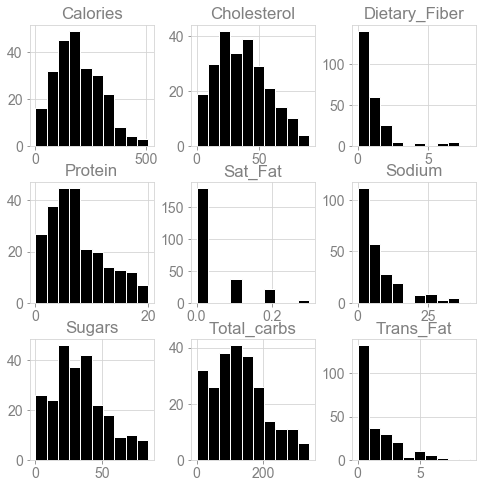

In [16]:
themes.theme_minimal(palette=themes.palettes.Colorblind.colors)
df.hist(figsize=(8,8));

Protein has a higher distribution below 10 grams.  It also looks like many of the drinks are 200 calories or less.  Total carbohydrates and Cholesteral have a fairly even distribution.  

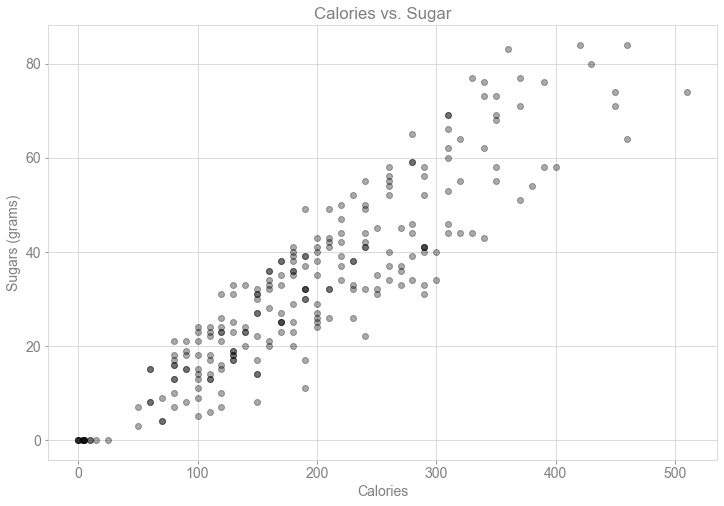

In [17]:
plt.scatter(data=df, x='Calories', y='Sugars', alpha=1/3)
plt.xlabel('Calories')
plt.ylabel('Sugars (grams)')
plt.title('Calories vs. Sugar');

In [18]:
num_vars = ['Calories', 'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol', 'Dietary_Fiber', 'Sugars', 'Protein']
cat_vars = ['Bev_category', 'Beverage', 'Bev_prep']

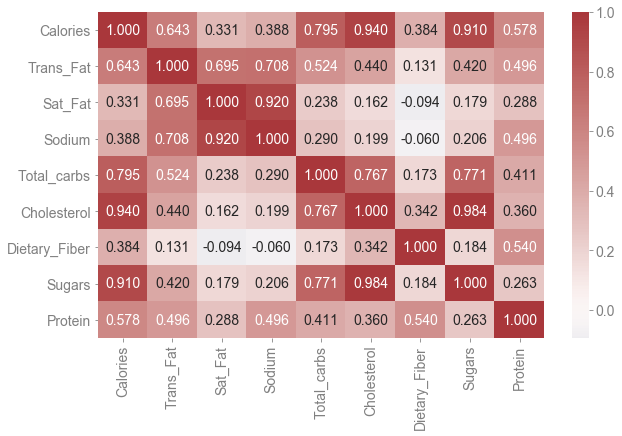

In [19]:
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.show();

The amount of calories has a high correlation with Cholesterol, Sugars, and also total_carbs.  I'll explore this further.

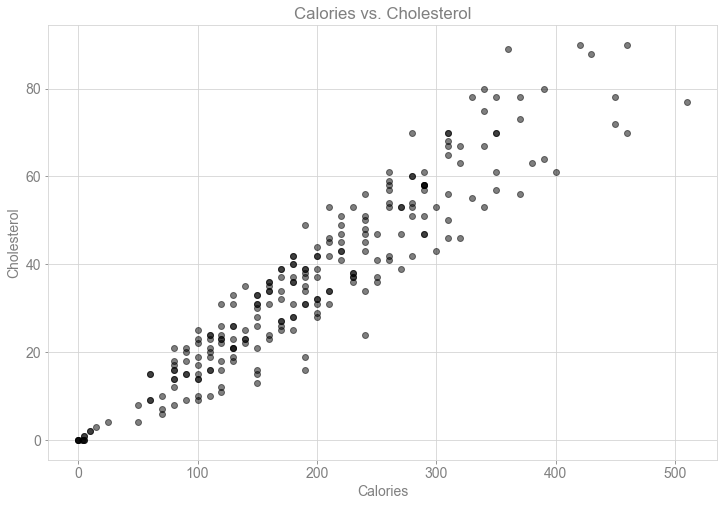

In [20]:
plt.scatter(data=df, x='Calories', y='Cholesterol', alpha=1/2)
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.title('Calories vs. Cholesterol');

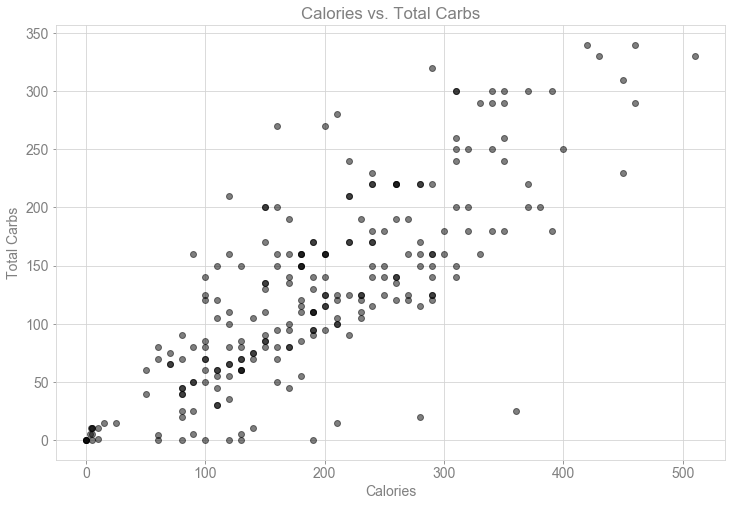

In [21]:
plt.scatter(data=df, x='Calories', y='Total_carbs', alpha=1/2)
plt.xlabel('Calories')
plt.ylabel('Total Carbs')
plt.title('Calories vs. Total Carbs');

### What drink has the most sugar?

In [22]:
mostsugar=df[df['Sugars']> 83]
mostsugar

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145


The Frappuccino Blended Coffee Java Chip (Without Whipped Cream) made with Venti NonFat Milk or Whole Milk both tie for the most sugar at 84 grams.

In [23]:
sugarover75=df[df['Sugars']> 75]
sugarover75

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
196,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1,0.5,0.0,5,300,80,1,76,7.0,10%,0%,15%,10%,140
197,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,390,6,3.5,0.1,15,300,80,1,76,6.0,8%,0%,15%,10%,140
205,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Venti Nonfat Milk,330,0.1,0.1,0.0,5,290,78,0,77,5.0,10%,0%,15%,2%,130
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145


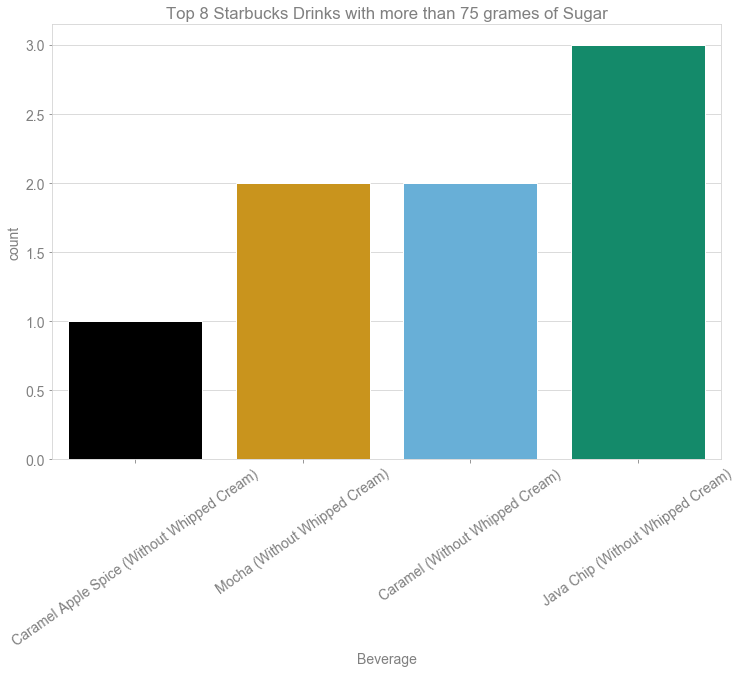

In [24]:
sb.countplot(data=sugarover75, x='Beverage')
plt.xticks(rotation=35)
plt.title('Top 8 Starbucks Drinks with more than 75 grames of Sugar');

If you want to avoid high sugar don't buy acaramel apple spice, mocha, caramel, or java chip frappuciano from Starbucks.

In [25]:
sugarover75=sugarover75.sort_values(by='Calories', ascending=True)
sugarover75

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
205,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Venti Nonfat Milk,330,0.1,0.1,0.0,5,290,78,0,77,5.0,10%,0%,15%,2%,130
196,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1,0.5,0.0,5,300,80,1,76,7.0,10%,0%,15%,10%,140
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130
197,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,390,6,3.5,0.1,15,300,80,1,76,6.0,8%,0%,15%,10%,140
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145


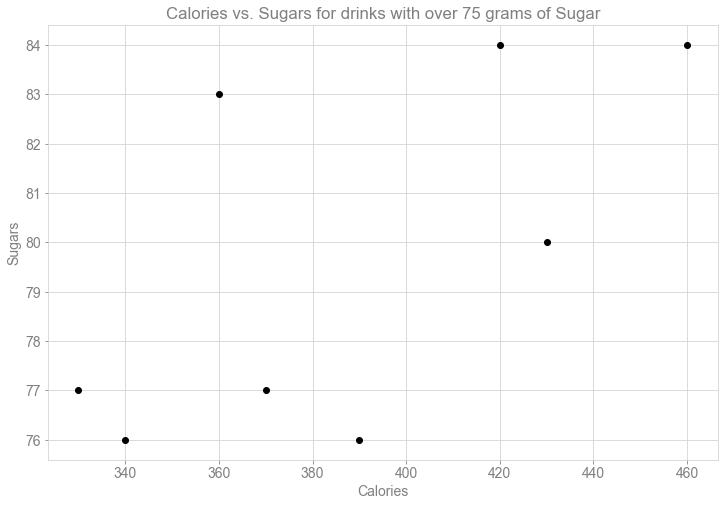

In [42]:
plt.scatter(data=sugarover75, x='Calories', y='Sugars')
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title('Calories vs. Sugars for drinks with over 75 grams of Sugar');

More Calories does not always mean more sugar for the drinks with over 75 grams of sugar.

 ### What drinks are available with less than 160 calories and less than 20 grams of sugar?

In [27]:
caloriesless160=df[(df['Calories'] <= 160) & (df['Sugars'] <= 20)]
caloriesless160.head()

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [43]:
caloriesless160.groupby(['Beverage']).mean()
caloriesless160

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


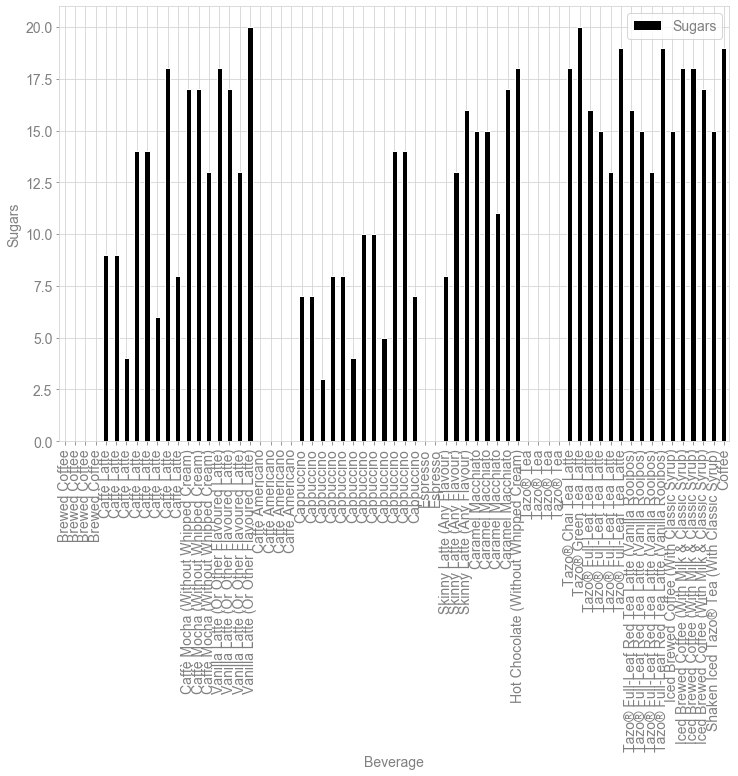

In [29]:
caloriesless160.plot(kind='bar', x='Beverage', y='Sugars')
plt.ylabel('Sugars')
plt.xticks(rotation=90);

In [30]:
caloriesless160.shape

(65, 18)

In [31]:
calorieslesssugar=df[(df['Calories'] <= 160) & (df['Sugars'] <= 10)]
calorieslesssugar.head()

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [32]:
calorieslesssugar.shape

(30, 18)

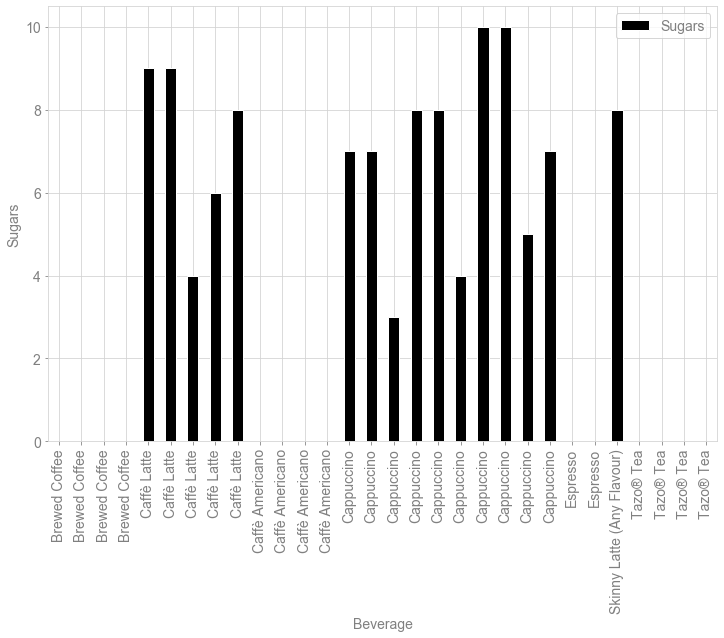

In [33]:
calorieslesssugar.plot(kind='bar', x='Beverage', y='Sugars')
plt.ylabel('Sugars')
plt.xticks(rotation=90);

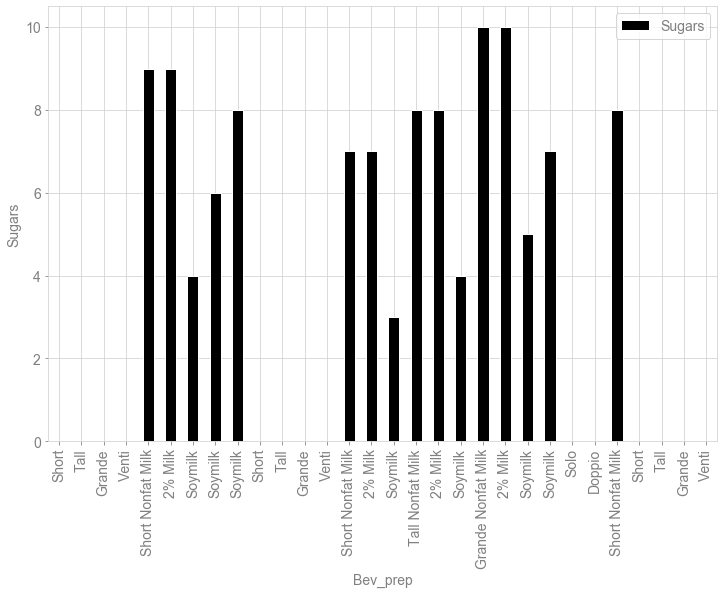

In [52]:
calorieslesssugar.plot(kind='bar', x='Bev_prep', y='Sugars')
plt.ylabel('Sugars')
plt.xticks(rotation=90);

In [53]:
cinos=calorieslesssugar[calorieslesssugar['Beverage']=='Cappuccino']
cinos.shape

(10, 18)

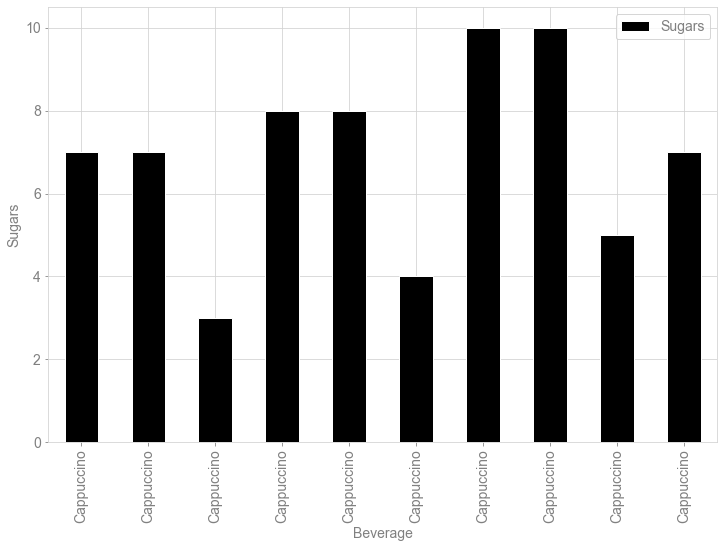

In [110]:
calorieslesssugar[calorieslesssugar['Beverage']=='Cappuccino'].plot(kind='bar', x='Beverage', y='Sugars')
plt.ylabel('Sugars')
plt.xticks(rotation=90);

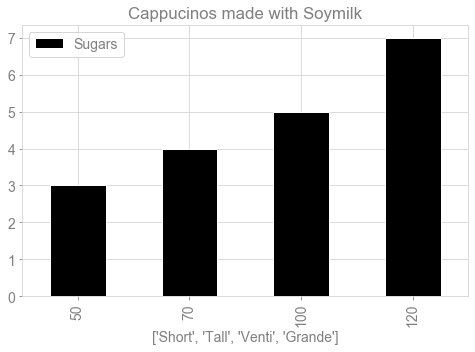

In [109]:
x_labels=['Short', 'Tall', 'Venti', 'Grande']
soy=cinos[cinos['Bev_prep']=='Soymilk']
soy.plot(kind='bar', x='Calories', y='Sugars', figsize=(8,5))
plt.xlabel(x_labels)
plt.title('Cappucinos made with Soymilk');

The soymilk option has the least amount of sugar in a Cappucino. 

In [112]:
 ### What drinks have the most protein?

In [119]:
mostprotein=df[df['Protein']>=18]
mostprotein

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
95,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Venti Nonfat Milk,320,3,2.0,0.0,10,180,63,2,55,18.0,25%,0%,50%,30%,30
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti Nonfat Milk,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30%,20%,60%,6%,110
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies
173,Smoothies,Banana Chocolate Smoothie,2% Milk,300,5,2.5,0.1,15,160,53,7,34,20.0,8%,15%,20%,20%,15
174,Smoothies,Banana Chocolate Smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6%,15%,20%,20%,15


White chocolate mocha, hot chocolate, and chocolate banana smoothie all rank in the top for high protein.